# MMSegmentation Tutorial
Welcome to MMSegmentation! 

In this tutorial, we demo
* How to do inference with MMSeg trained weight
* How to train on your own dataset and visualize the results. 

## Install MMSegmentation
This step may take several minutes. 

We use PyTorch 1.10 and CUDA 11.1 for this tutorial. You may install other versions by change the version number in pip install command. 

In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609
Copyright (C) 2015 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# Install PyTorch
!conda install pytorch=1.10.0 torchvision cudatoolkit=11.1 -c pytorch

# Install MMCV
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ^C
failed with repodata from current_repodata.json, will retry with next repodata source.

CondaError: KeyboardInterrupt

Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html


In [3]:
!pip install -e .

正克隆到 'mmsegmentation'...
remote: Enumerating objects: 7384, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 7384 (delta 46), reused 63 (delta 24), pack-reused 7276
接收对象中: 100% (7384/7384), 13.42 MiB | 42.00 KiB/s, 完成.
处理 delta 中: 100% (5458/5458), 完成.
检查连接... 完成。
/home/chenyi/DATA620004-homework3_videoseg/mmsegmentation
Obtaining file:///home/chenyi/DATA620004-homework3_videoseg/mmsegmentation
     |████████████████████████████████| 577 kB 52 kB/s eta 0:00:01
  Running setup.py develop for mmsegmentation


In [1]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

1.10.0 True
0.25.0


## Run Inference with MMSeg trained weight

In [8]:
!mkdir checkpoints
!wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P checkpoints

mkdir: 无法创建目录"checkpoints": 文件已存在
--2022-06-26 21:43:27--  https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
正在解析主机 download.openmmlab.com (download.openmmlab.com)... 47.102.71.56
正在连接 download.openmmlab.com (download.openmmlab.com)|47.102.71.56|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度： 196205945 (187M) [application/octet-stream]
正在保存至: “checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth.1”

pspnet_r50-d8_512x1 100%[===================>] 187.12M  13.6MB/s    in 14s     

2022-06-26 21:43:40 (13.8 MB/s) - 已保存 “checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth.1” [196205945/196205945])



In [28]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

In [29]:
config_file = 'configs/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes.py'
checkpoint_file = 'checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

In [30]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth


In [31]:
# test a single image
img = 'demo/demo.png'
result = inference_segmentor(model, img)

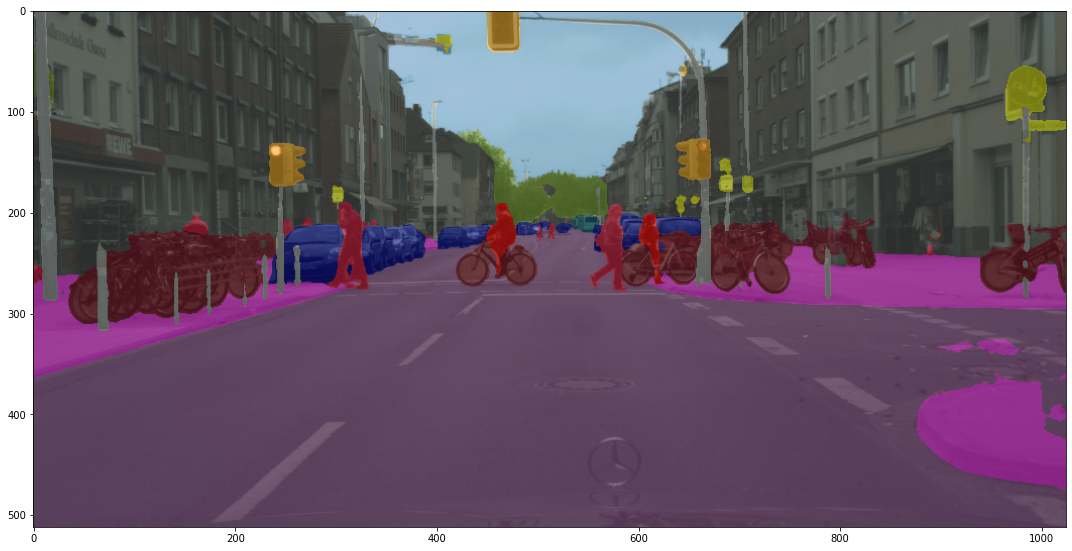

In [32]:
# show the results
show_result_pyplot(model, img, result, get_palette('cityscapes'), out_file = "./demo_infered.png")

In [12]:
show_result_pyplot

<function mmseg.apis.inference.show_result_pyplot(model, img, result, palette=None, fig_size=(15, 10), opacity=0.5, title='', block=True, out_file=None)>

In [13]:
!pip install opencv-python

In [13]:
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
import cv2
vidcap = cv2.VideoCapture('./content/dalian_drive.mp4')

In [14]:
vidcap.isOpened()

True

In [18]:
fps = vidcap.get(cv2.CAP_PROP_FPS) 
fps

29.96969696969697

In [11]:
image.shape

(720, 1280, 3)

In [27]:
!mkdir frames

save frame as JPEG file  

In [ ]:
while success:
  cv2.imwrite("./frames/frame%d.jpg" % count, image) 
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1
  if count >= 6000:
    break

In [2]:
!mkdir inferred_frame

In [ ]:
# test a single image
import cv2
for count in range(6000):
  img = "./frames/frame%d.jpg" % count
  result = inference_segmentor(model, img)
  show_result_pyplot(model, img, result, get_palette('cityscapes'), out_file = "./inferred_frame/frame%d.jpg" % count)

In [20]:
fourcc = cv2.VideoWriter_fourcc('M', 'J', 'P', 'G')

out = cv2.VideoWriter('video_inference.avi', fourcc, 30, (1280,720), isColor=True)

for count in range(6000):
  img = "./inferred_frame/frame%d.jpg" % count
  img = cv2.imread(img)
  out.write(img)
    
out.release()